# COVID-19 in Canada
    data from https://github.com/ishaberry/Covid19Canada

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

path='~/Documents/Covid19Canada/'
filecases='timeseries_hr/cases_timeseries_hr.csv'
filedeath='timeseries_hr/mortality_timeseries_hr.csv'

def ddmmyyyyToDate(ddmmyyyy,sep='-',mode='date'):
    i1=ddmmyyyy.find(sep)
    i2=ddmmyyyy.find(sep,i1+1)
    d=int(ddmmyyyy[0:i1])
    m=int(ddmmyyyy[i1+1:i2])
    yyyy=int(ddmmyyyy[i2+1:])
    if yyyy<100:
        yyyy+=2000
    date=datetime.date(yyyy,m,d)
    if mode=='datetime':
        date=datetime.datetime(yyyy,m,d,0,0,0)
    elif mode=='np.datetime64':
        date=np.datetime64(date)
    return date
    
print(' --setup and functions')

 --setup and functions


In [2]:
dfcases=pd.read_csv(path+filecases)
dfdeath=pd.read_csv(path+filedeath)
dfdeath['date_report']=dfdeath['date_death_report']
df=dfcases.merge(dfdeath,on=['province','health_region','date_report'],how='outer')
df['date']=df['date_report'].apply(lambda d:ddmmyyyyToDate(d))
del df['date_death_report'],df['date_report']
dfprov=df.groupby(['province','date']).sum().reset_index(drop=False)

dfnat=dfprov.groupby(['date']).sum().reset_index(drop=False)

df['SMA_cases_5']=df['cases'].rolling(window=5).mean()
df['SMA_deaths_5']=df['deaths'].rolling(window=5).mean()
dfprov['SMA_cases_5']=dfprov['cases'].rolling(window=5).mean()
dfprov['SMA_deaths_5']=dfprov['deaths'].rolling(window=5).mean()
dfnat['SMA_cases_5']=dfnat['cases'].rolling(window=5).mean()
dfnat['SMA_deaths_5']=dfnat['deaths'].rolling(window=5).mean()

maxdate=max(df['date'])
print("Data as of ",maxdate)

Data as of  2020-05-05


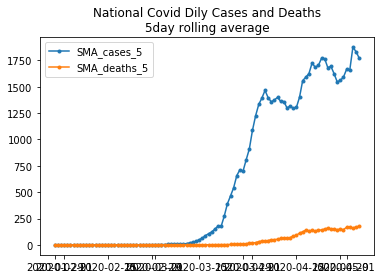

In [3]:
plt.plot(dfnat['date'],dfnat['SMA_cases_5'],'.-')
plt.plot(dfnat['date'],dfnat['SMA_deaths_5'],'.-')
plt.title("National Covid Dily Cases and Deaths\n5day rolling average")
plt.legend()

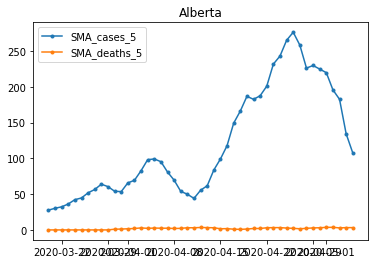

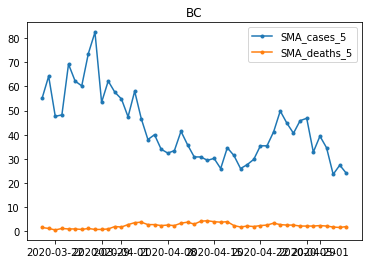

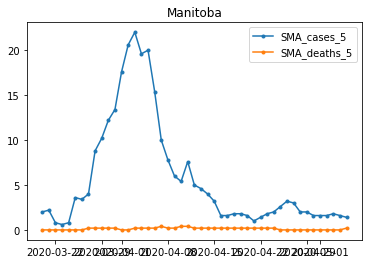

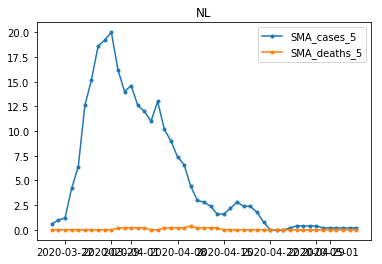

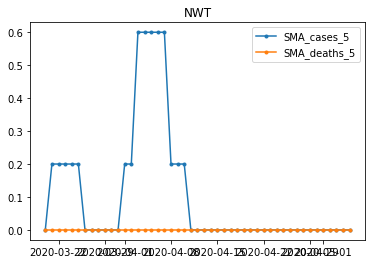

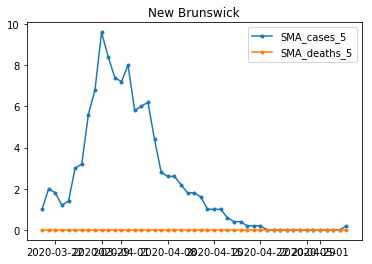

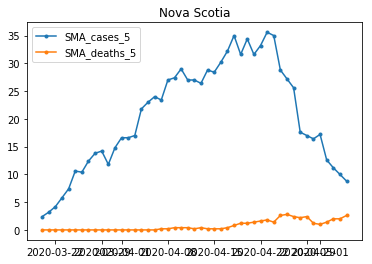

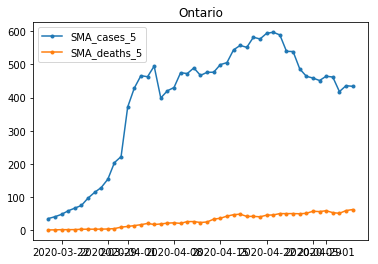

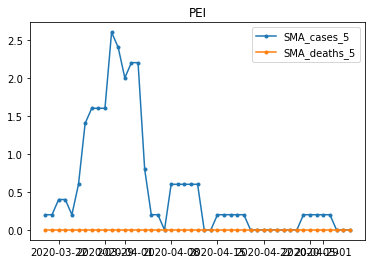

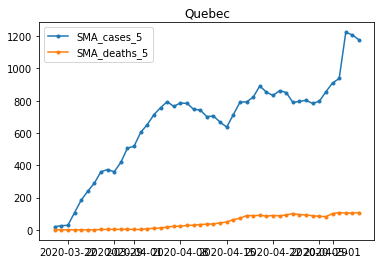

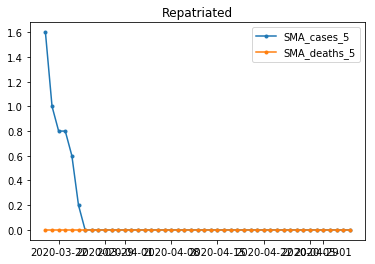

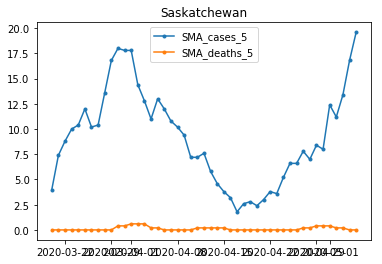

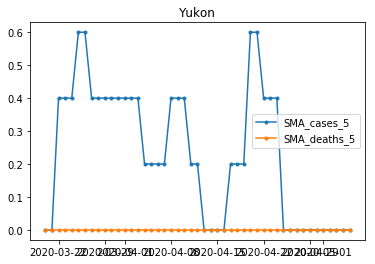

In [4]:
startdate=datetime.date(2020,3,20)
for prov in dfprov['province'].unique():
    dftmp=dfprov[dfprov['date']>=startdate]
    dftmp=dftmp[dftmp['province']==prov]
    plt.figure()
    plt.plot(dftmp['date'],dftmp['SMA_cases_5'],'.-')
    plt.plot(dftmp['date'],dftmp['SMA_deaths_5'],'.-')
    plt.title(prov)
    plt.legend()

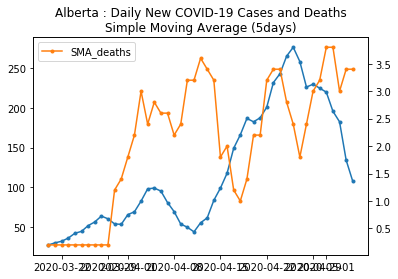

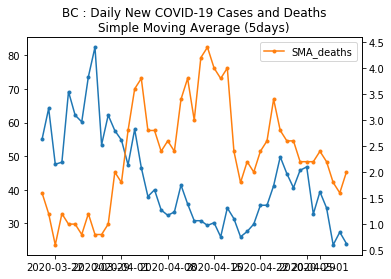

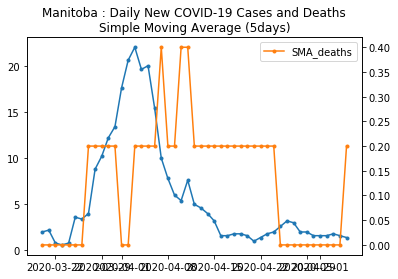

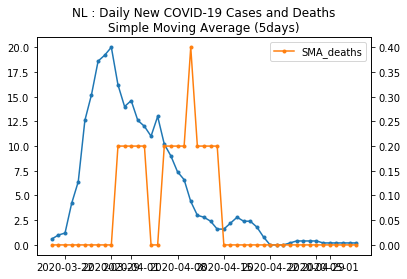

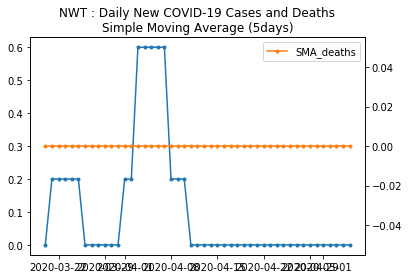

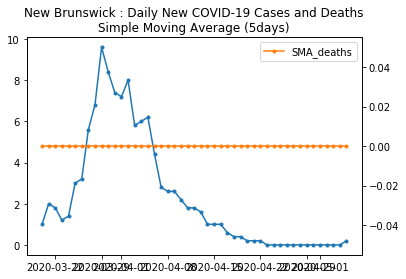

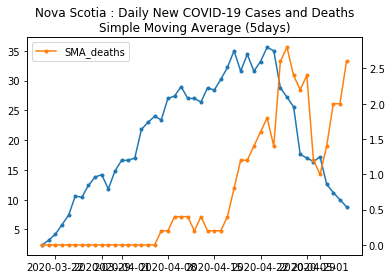

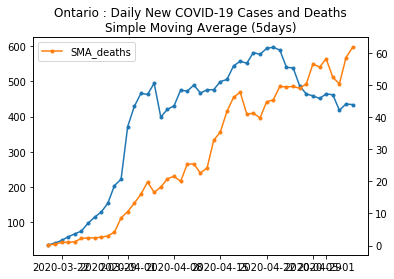

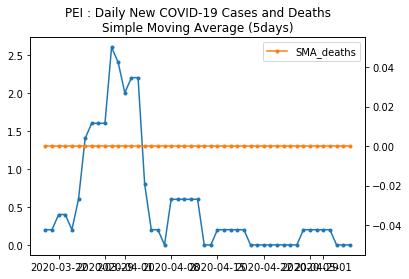

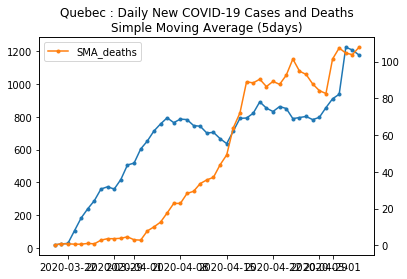

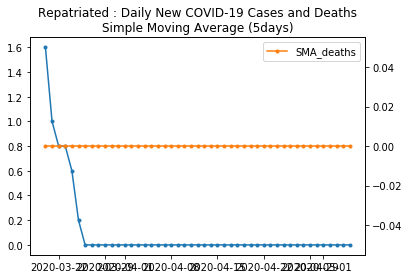

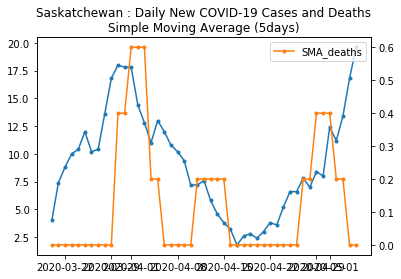

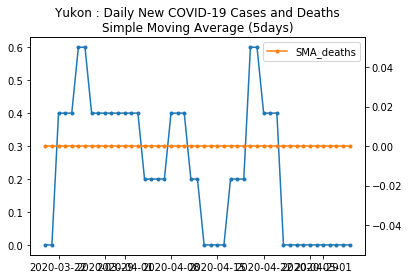

In [9]:
startdate=datetime.date(2020,3,20)
for prov in dfprov['province'].unique():
    dftmp=dfprov[dfprov['date']>=startdate]
    dftmp=dftmp[dftmp['province']==prov]
    fig,ax1=plt.subplots()
    ax2=ax1.twinx()
    ax1.plot(dftmp['date'],dftmp['SMA_cases_5'],'.-',color='C0',label='SMA_cases')
    ax2.plot(dftmp['date'],dftmp['SMA_deaths_5'],'.-',color='C1',label='SMA_deaths')
    plt.title(prov+" : Daily New COVID-19 Cases and Deaths\nSimple Moving Average (5days)")
    plt.legend()